## 1. import library ที่จำเป็นในการคำนวณ Gradient Descent 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. import file from local drive (.csv)

In [9]:
df=pd.read_csv('C:\\Example.csv')
df

,sqft_living,price
0,0,1
1,1,3
2,2,7
3,3,13
4,4,21


## 3. Plot ดูการกระจายตัวของข้อมูล

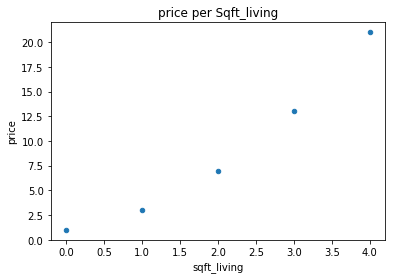

In [10]:
df.plot.scatter(x='sqft_living', y='price',title='price per Sqft_living')

## 4. นำข้อมูลที่ได้มาคำนวณด้วย Gradient Descent Algorithm

In [11]:
x  = df['sqft_living'].tolist()
y  = df['price'].tolist()
m = len(x)

In [12]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x

def grad_J(x,y,m,theta_0,theta_1):
    returnValue = np.array([0.,0.])
    for i in range(m):
        returnValue[0] += (h(theta_0,theta_1,x[i])-y[i])
        returnValue[1] += (h(theta_0,theta_1,x[i])-y[i])*x[i]
    return returnValue

In [13]:
theta_old = np.array([0.,0.]) 
theta_new = np.array([0.,0.]) 
learning_rate = 0.05 
tolerance = 0.01
num_steps = 0
magnitude = float("inf")

while np.linalg.norm(magnitude) > tolerance:
    num_steps += 1
    theta_old = theta_new
    magnitude = -grad_J(x,y,m,theta_old[0],theta_old[1])
    theta_new = theta_old + learning_rate * magnitude

print ("Local minimum occurs where:")
print ("theta_0 =", theta_new[0])
print ("theta_1 =", theta_new[1])
print ("This took",num_steps,"steps to converge")


Local minimum occurs where:
theta_0 = -0.9942069818917416
theta_1 = 4.997967918970868
This took 78 steps to converge


## 5.พล็อตกราฟแสดงค่าประมาณการที่ได้

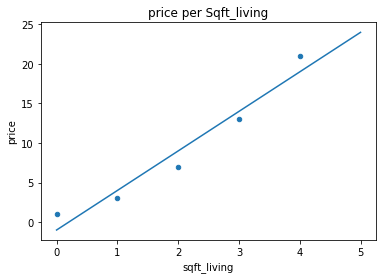

In [14]:
xx = np.linspace(0,5) 
df.plot.scatter(x='sqft_living', y='price',title='price per Sqft_living')
plt.plot(xx,h(theta_new[0],theta_new[1],xx))
plt.show()